### Importing Necessary Libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


### Loading and Splitting the dataset into train and test

In [53]:
data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(data=data.data, columns=data.feature_names)
column_names = list(df.columns.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

### Storing Data in a Dataframe

In [54]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df_melt = pd.melt(df, id_vars=['target'], var_name='features', value_name='value')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Correlation Matrix among the Features

<Axes: >

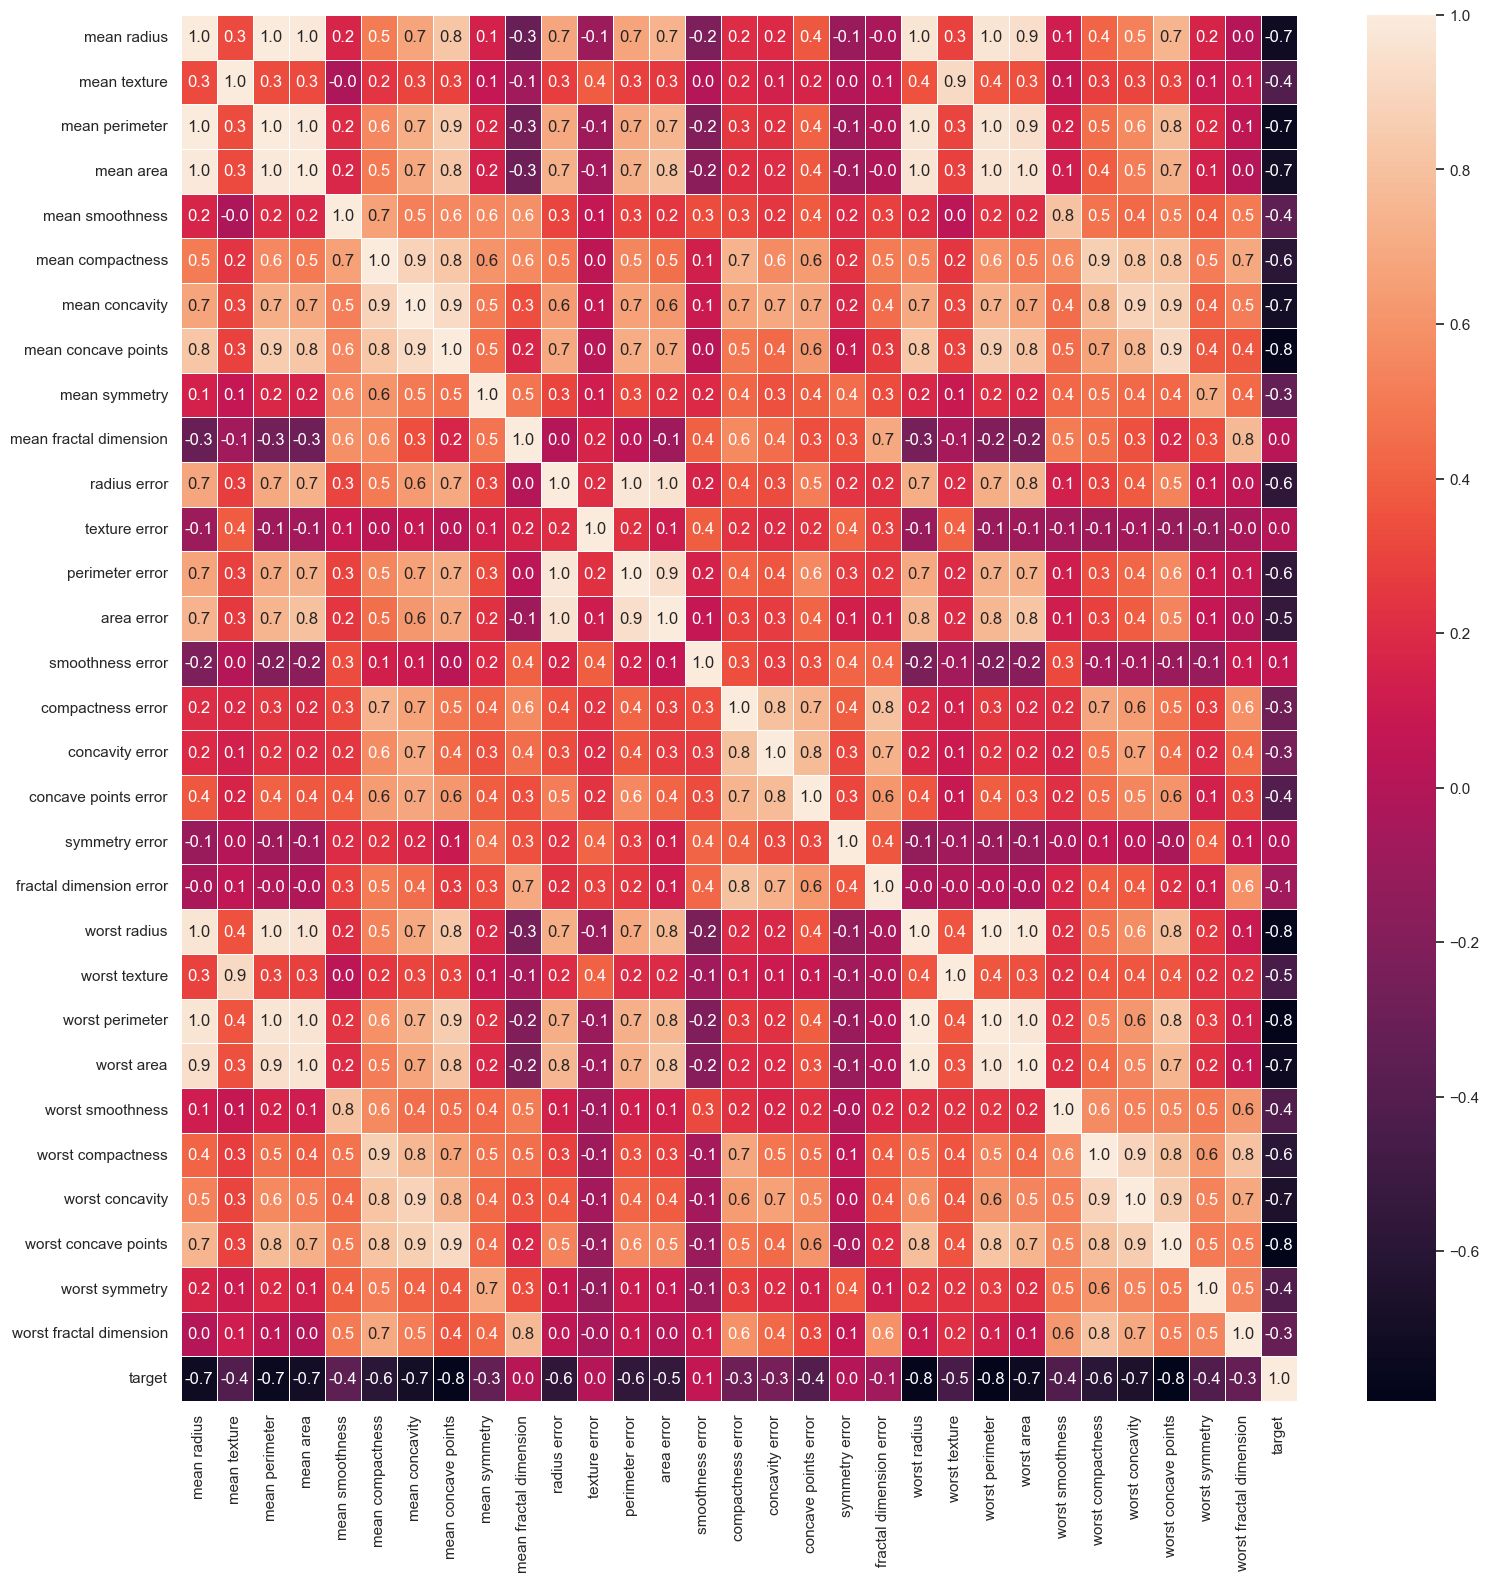

In [55]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Box Plot for Distribution of Data

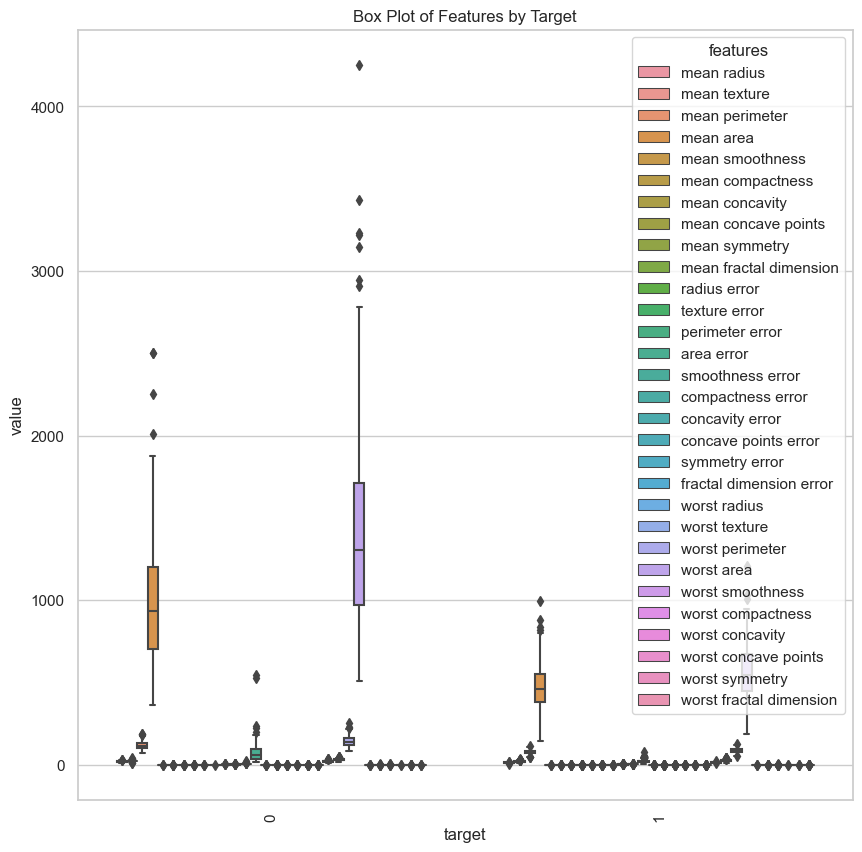

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='value', hue='features', data=df_melt)
plt.xticks(rotation=90)
plt.title('Box Plot of Features by Target')
plt.show()

### Definition of Fitness Function for the ACO

In [57]:
def fitness(X_train, X_test, y_train, y_test, mask):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train[:, np.ravel(mask)], y_train)
    return clf.score(X_test[:, np.ravel(mask)], y_test)

### Definition of ACO function

In [58]:
def ACO(X_train, X_test, y_train, y_test, ants, iterations):
    features = X_train.shape[1]
    # Initialize the pheromone matrix
    pheromone = np.ones(features)
    alpha = 1.0     # Pheromone importance
    beta = 2.0      # Heuristic importance
    rho = 0.5       # Pheromone evaporation rate

    for i in range(iterations):
        # Generate the ant solutions
        solutions = []
        for j in range(ants):
            mask = np.full(features, False, dtype=bool)
            for k in range(features):
                # Calculate the probabilities for each feature
                prob = pheromone[k]**alpha * (1.0 / (1.0 + np.exp(-beta * X_train[:,k])))
                # Select the feature based on the probabilities
                mask[k] = np.random.choice(a=[True, False], p = [prob[k],1-prob[k]])
            solutions.append(mask)
        # Update the pheromone matrix
        for j in range(ants):
            mask = solutions[j]
            fitness_j = fitness(X_train, X_test, y_train, y_test, mask)
            for k in range(features):
                if mask[k]:
                    pheromone[k] = (1.0 - rho) * pheromone[k] + rho * fitness_j
                else:
                    pheromone[k] = (1.0 - rho) * pheromone[k]
    best_mask = solutions[0]
    best_fitness = fitness(X_train, X_test, y_train, y_test, best_mask)
    for mask in solutions[1:]:
        fitness_i = fitness(X_train, X_test, y_train, y_test, mask)
        if fitness_i > best_fitness:
            best_mask = mask
            best_fitness = fitness_i
    return best_mask, best_fitness

### Test the ACO function and print results

In [59]:
ants = 10
iterations = 10
best_mask, best_fitness = ACO(X_train, X_test, y_train, y_test, ants, iterations)
selected_features=[]
for i in range(len(best_mask)):
    if(best_mask[i]==True):
        selected_features.append(column_names[i])
print("Selected features:", selected_features)
pd.DataFrame(selected_features, columns=['features'])
print("Accuracy:", best_fitness)

Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'radius error', 'perimeter error', 'area error', 'worst perimeter']
Accuracy: 0.9415204678362573
